In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.learning_curve import learning_curve
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import  cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.model_selection import validation_curve
import datetime

import sklearn.preprocessing as preprocessing
import timeit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationalnum','marital-status', 'occupation', 'relationship', 'race', 'gender','capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry','income']

train = pd.read_csv('adult.csv', header=None, names = columns)
test = pd.read_csv('adult_test.csv',  header=None, names = columns)

adult = pd.concat([train,test])

len(adult)

48842

In [3]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationalnum',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'income'],
      dtype='object')

In [4]:
adult['nativecountry'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [5]:
print("Before dropping size = " , len(adult))

adult = adult[adult.occupation.str.strip() != '?']
adult = adult[adult.workclass.str.strip() != '?']
adult = adult[adult.nativecountry.str.strip() != '?']

print("After removing rows with value ?" , len(adult))


Before dropping size =  48842
After removing rows with value ? 45222


In [6]:
def func(x):
    if(x == " <=50K" or x == " <=50K."):
        return 0
    elif(x == " >50K" or x == ' >50K.'):
        return 1
adult['income'] = adult['income'].apply(func)

y = adult['income']
del adult['income']

In [7]:
adult.head()

,age,workclass,fnlwgt,education,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


#### Education and educationnum both represent the level of education. So we can remove one of them.
#### fnlwgt – The number of people the census takers believe that observation represents. Remove this variable.

In [8]:
del adult['education']
del adult['fnlwgt']

In [9]:
adult.head()

,age,workclass,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [10]:
adult = pd.get_dummies(adult, columns=['workclass','marital-status','occupation',
                                         'relationship','race',
                                         'gender','nativecountry'])

In [11]:
adult.shape

(45222, 87)

In [12]:

# Train - Test split# Train  
X_train, X_test, y_train, y_test = train_test_split(adult, y, test_size  = 0.3, random_state = 55)

print("Training dataset size: ", len(X_train))
print("Testing dataset size: ", len(X_test))
print("Training label dataset size: ", len(y_train))
print("Testing label dataset size: ", len(y_test))

Training dataset size:  31655
Testing dataset size:  13567
Training label dataset size:  31655
Testing label dataset size:  13567


### Create a decision tree classifier without any pruning

In [13]:
scoring=make_scorer(accuracy_score)
clf =  tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = scoring)
print("Accuracy of tree without pruning :" , np.mean(scores))

predictions = clf.predict(X_test)

print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))


Accuracy of tree without pruning : 0.81718616391
Accuracy: 81.5729343259%
[[8971 1184]
 [1316 2096]]



train_scores = [ 0.99283708  0.98939793  0.98712848  0.98487933  0.98297529  0.98084596
  0.97913449  0.97775438  0.97702418  0.97559058]
test_scores = [ 0.80672936  0.81228909  0.80950899  0.80957218  0.81355265  0.81459533
  0.81399472  0.81772269  0.81819625  0.81772306]
train sizes = [ 2848  5697  8546 11395 14244 17093 19942 22791 25640 28489]


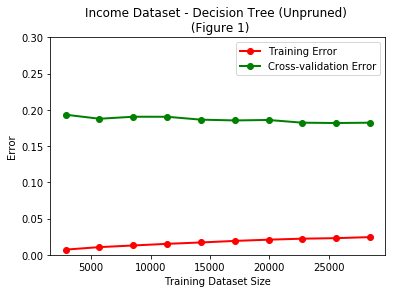

In [14]:
estimator = tree.DecisionTreeClassifier()
estimator.fit(X_train, y_train)

title = "Income Dataset - Decision Tree (Unpruned) \n (Figure 1)"
ylim=(0.0, 0.3)
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
#cv = StratifiedKFold(y_train, n_folds=10)
#plot_learning_curve(estimator, title, X_train, y_train, , cv=cv, n_jobs=4)



plt.title(title)
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_train, y_train, cv=10, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10))



train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#test_scores_mean1 = np.mean(test_scores1, axis=1)

print("")
    
lw = 2
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
             label="Training Error",  lw=lw)
plt.plot(train_sizes, (1- test_scores_mean), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)

plt.legend(loc="best")
print("train_scores =", train_scores_mean)
print("test_scores =", test_scores_mean)
print("train sizes =", train_sizes)
#plt.rcParams.update({'font.size': 12})
#plt.savefig("Figure-1.png")
plt.show()



### Check for hyper paramters using max_depth

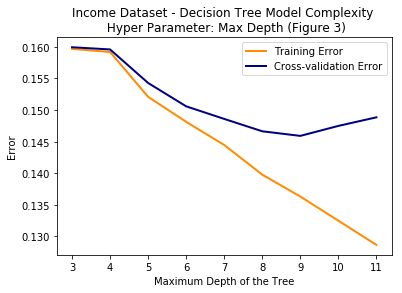

Optimal max depth =  9  at Minimum Cross Validation Error =   0.145916958242


In [15]:

np.random.seed(55)
estimator = tree.DecisionTreeClassifier()


param_range = np.arange(3,12)
train_scores, test_scores = validation_curve( estimator, X_train, y_train, param_name="max_depth", param_range=param_range,
    cv=10, scoring=make_scorer(accuracy_score), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Income Dataset - Decision Tree Model Complexity \n Hyper Parameter: Max Depth (Figure 3)")
plt.xlabel("Maximum Depth of the Tree")
plt.ylabel("Error")


lw = 2
plt.plot(param_range, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_range, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
#plt.rcParams.update({'font.size': 12})
plt.show()
#plt.savefig("Figure-2.png")

#print("train_scores =", train_mean)
#print("test_scores =", test_mean)
print("Optimal max depth = ",  param_range[np.ndarray.argmax(test_mean)], " at Minimum Cross Validation Error =  " , (1 - np.amax(test_mean))  )


### Choose optimal min_samples_leaf


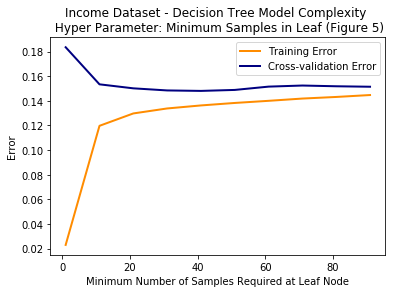

train_scores = [ 0.97697837  0.88028748  0.87023378  0.86619017  0.863734    0.86172011
  0.85999054  0.85815039  0.85684727  0.85529145]
test_scores = [ 0.81649024  0.84659609  0.84985009  0.8515559   0.85193486  0.85114529
  0.84846014  0.84757552  0.84817586  0.84855499]
Optimal minimum samples to split =  41  Minimum Error =   0.14806514292


In [16]:
np.random.seed(55)
estimator = tree.DecisionTreeClassifier()


param_range = np.arange(1,100,10)
train_scores, test_scores = validation_curve( estimator, X_train, y_train, param_name="min_samples_leaf", param_range=param_range,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Income Dataset - Decision Tree Model Complexity \n Hyper Parameter: Minimum Samples in Leaf (Figure 5)")
plt.xlabel("Minimum Number of Samples Required at Leaf Node")
plt.ylabel("Error")


lw = 2
plt.plot(param_range, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_range, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
#plt.rcParams.update({'font.size': 12})
plt.show()
#plt.savefig("Figure-3.png")

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal minimum samples to split = ",  param_range[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )

In [17]:
(np.ndarray.argmax(test_scores_mean)  + 1 ) * 0.1 * len(X_train)

28489.5

### Create learning curve - Sample data set size vs. Error


train_scores = [ 0.85091292  0.85455503  0.8551135   0.85532251  0.85509688  0.85531504
  0.85661418  0.85624589  0.85683307  0.8571589 ]
test_scores = [ 0.83670805  0.84327922  0.84558557  0.84684897  0.84909172  0.8491235
  0.85281967  0.85203002  0.85263024  0.85281962]
train sizes = [ 2848  5697  8546 11395 14244 17093 19942 22791 25640 28489]


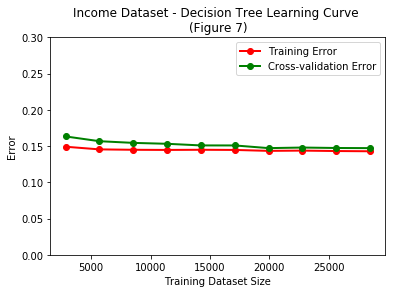

In [18]:
np.random.seed(55)
estimator = tree.DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 41)
st_train_time = timeit.default_timer() 
estimator.fit(X_train, y_train)
end_train_time = timeit.default_timer() 

title = "Income Dataset - Decision Tree Learning Curve \n(Figure 7)"
ylim=(0.0, 0.3)
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
#cv = StratifiedKFold(y_train, n_folds=10)
#plot_learning_curve(estimator, title, X_train, y_train, , cv=cv, n_jobs=4)



plt.title(title)
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_train, y_train, cv=10, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10), shuffle = True)



train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#test_scores_mean1 = np.mean(test_scores1, axis=1)

print("")
    
lw = 2
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
             label="Training Error",  lw=lw)
plt.plot(train_sizes, (1- test_scores_mean), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)

plt.legend(loc="best")
print("train_scores =", train_scores_mean)
print("test_scores =", test_scores_mean)
print("train sizes =", train_sizes)
#plt.rcParams.update({'font.size': 12})
plt.show()
#plt.savefig("Figure-4.png")




### Predict on Testing set

In [19]:

st_pred_time = timeit.default_timer() 
y_pred = estimator.predict(X_test)
end_pred_time = timeit.default_timer() 

pred_time = end_pred_time - st_pred_time


print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['y', 'n']))
print("AUC =", roc_auc_score(y_test, y_pred))
print("Prediction Time (microSec) = ", pred_time)
print("Training Time (microSec) = ", end_train_time - st_train_time)

#Create timings for Cross-validation set


Accuracy: 85.6416304268%
[[9673  482]
 [1466 1946]]
             precision    recall  f1-score   support

          y       0.87      0.95      0.91     10155
          n       0.80      0.57      0.67      3412

avg / total       0.85      0.86      0.85     13567

AUC = 0.761437836627
Prediction Time (microSec) =  0.02016351599013433
Training Time (microSec) =  0.19527540399576537


In [20]:
estimator.n_features_

87